In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
train_dir='/kaggle/input/private-datasetrar/227x227/train'
valid_dir='/kaggle/input/private-datasetrar/227x227/valid'
test_dir='/kaggle/input/private-datasetrar/227x227/test'

In [3]:
batch_size = 32
img_height,img_width = (227,227)
num_classes = 2
EPOCHS = 50

In [4]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 1593 images belonging to 2 classes.


In [6]:
valid_generator = train_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 457 images belonging to 2 classes.


In [7]:
test_generator = train_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 455 images belonging to 2 classes.


In [8]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['Diseased', 'Healthy']


In [9]:
target_names = ['Diseased', 'Healthy']

Epoch 1
1/1 [==============================] - 0s 48ms/step


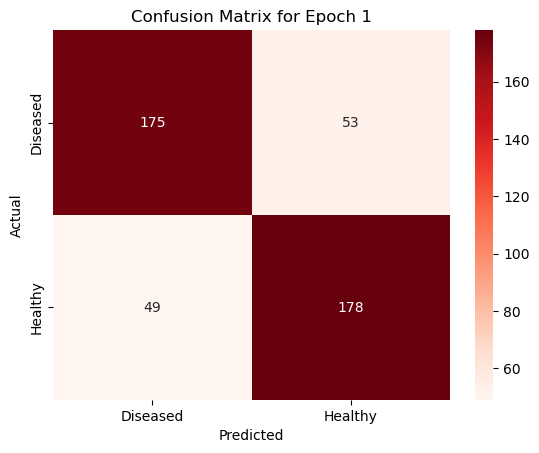

Test accuracy: 77.58241758241759
              precision    recall  f1-score   support

    Diseased       0.78      0.77      0.77       228
     Healthy       0.77      0.78      0.78       227

    accuracy                           0.78       455
   macro avg       0.78      0.78      0.78       455
weighted avg       0.78      0.78      0.78       455

-----------------------------------------------------
Epoch 2
1/1 [==============================] - 0s 18ms/step


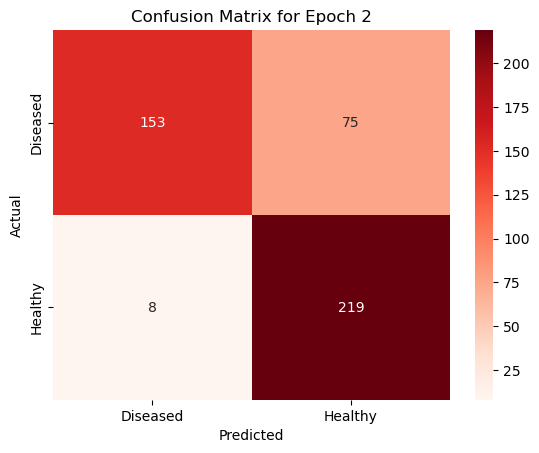

Test accuracy: 81.75824175824175
              precision    recall  f1-score   support

    Diseased       0.95      0.67      0.79       228
     Healthy       0.74      0.96      0.84       227

    accuracy                           0.82       455
   macro avg       0.85      0.82      0.81       455
weighted avg       0.85      0.82      0.81       455

-----------------------------------------------------
Epoch 3
1/1 [==============================] - 0s 18ms/step


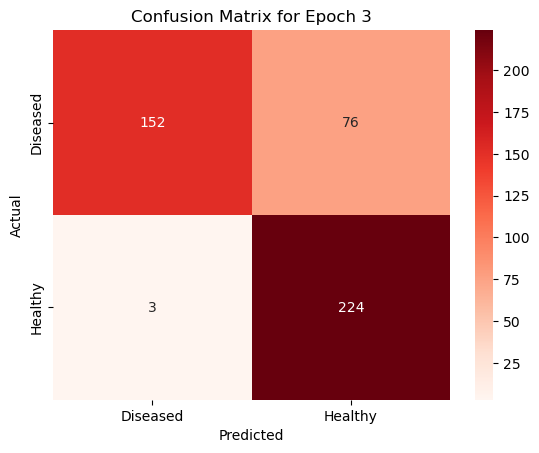

Test accuracy: 82.63736263736263
              precision    recall  f1-score   support

    Diseased       0.98      0.67      0.79       228
     Healthy       0.75      0.99      0.85       227

    accuracy                           0.83       455
   macro avg       0.86      0.83      0.82       455
weighted avg       0.86      0.83      0.82       455

-----------------------------------------------------
Epoch 4
1/1 [==============================] - 0s 23ms/step


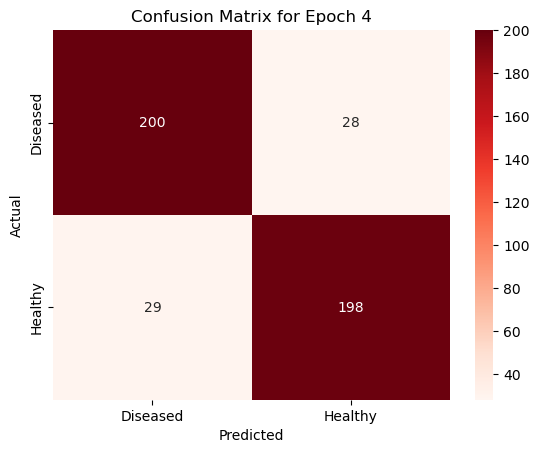

Test accuracy: 87.47252747252747
              precision    recall  f1-score   support

    Diseased       0.87      0.88      0.88       228
     Healthy       0.88      0.87      0.87       227

    accuracy                           0.87       455
   macro avg       0.87      0.87      0.87       455
weighted avg       0.87      0.87      0.87       455

-----------------------------------------------------
Epoch 5
1/1 [==============================] - 0s 19ms/step


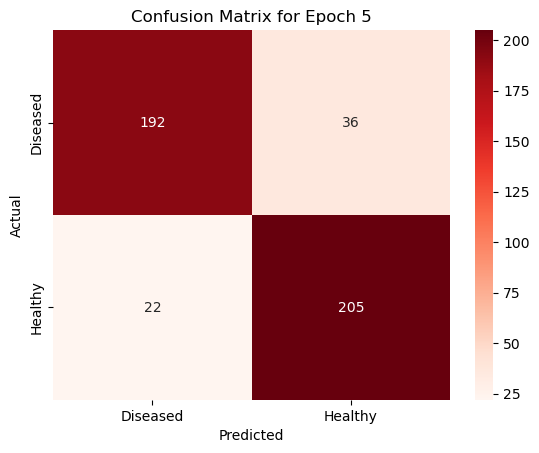

Test accuracy: 87.25274725274726
              precision    recall  f1-score   support

    Diseased       0.90      0.84      0.87       228
     Healthy       0.85      0.90      0.88       227

    accuracy                           0.87       455
   macro avg       0.87      0.87      0.87       455
weighted avg       0.87      0.87      0.87       455

-----------------------------------------------------


In [10]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

saved_model_filepaths = [
    '/kaggle/input/alexnet-2/Alexnet/50epoch.10-0.51.h5',
    '/kaggle/input/alexnet-2/Alexnet/50epoch.13-0.49.h5',
    '/kaggle/input/alexnet-2/Alexnet/50epoch.24-0.44.h5',
    '/kaggle/input/alexnet-2/Alexnet/50epoch.37-0.47.h5',
    '/kaggle/input/alexnet-2/Alexnet/50epoch.46-0.36.h5'
]

# Iterate over the saved model file paths
for epoch, model_filepath in enumerate(saved_model_filepaths, start=1):
    print("Epoch {}".format(epoch))
    
    # Load the model
    model = tf.keras.models.load_model(model_filepath)

    filenames = test_generator.filenames
    nb_samples = len(test_generator)

    y_prob = []
    y_act = []

    test_generator.reset()
    for _ in range(nb_samples):
        X_test, Y_test = test_generator.next()
        y_prob.append(model.predict(X_test))
        y_act.append(Y_test)

    predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
    actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

    out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])

    confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

    sn.heatmap(confusion_matrix, cmap='Reds', annot=True, fmt='d')
    plt.title('Confusion Matrix for Epoch {}'.format(epoch))
    plt.show()

    print('Test accuracy: {}'.format((np.diagonal(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100)))

    # Generate classification report
    classification_rep = classification_report(out_df['actual_class'], out_df['predicted_class'], target_names=target_names)
    print(classification_rep)
    print("-----------------------------------------------------")